In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('world-happiness-report.csv')

In [6]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [8]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Print the missing values
print(missing_values)

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64


In [10]:
# Replace missing values with the mean of each column
df['Log GDP per capita'].fillna(df['Log GDP per capita'].mean(), inplace=True)
df['Social support'].fillna(df['Social support'].mean(), inplace=True)
df['Healthy life expectancy at birth'].fillna(df['Healthy life expectancy at birth'].mean(), inplace=True)
df['Freedom to make life choices'].fillna(df['Freedom to make life choices'].mean(), inplace=True)
df['Generosity'].fillna(df['Generosity'].mean(), inplace=True)
df['Perceptions of corruption'].fillna(df['Perceptions of corruption'].mean(), inplace=True)
df['Positive affect'].fillna(df['Positive affect'].mean(), inplace=True)
df['Negative affect'].fillna(df['Negative affect'].mean(), inplace=True)

# Print the updated DataFrame
print(df)

     Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008        3.724               7.370           0.451   
1     Afghanistan  2009        4.402               7.540           0.552   
2     Afghanistan  2010        4.758               7.647           0.539   
3     Afghanistan  2011        3.832               7.620           0.521   
4     Afghanistan  2012        3.783               7.705           0.521   
...           ...   ...          ...                 ...             ...   
1944     Zimbabwe  2016        3.735               7.984           0.768   
1945     Zimbabwe  2017        3.638               8.016           0.754   
1946     Zimbabwe  2018        3.616               8.049           0.775   
1947     Zimbabwe  2019        2.694               7.950           0.759   
1948     Zimbabwe  2020        3.160               7.829           0.717   

      Healthy life expectancy at birth  Freedom to make life choices  \
0              

C:\Users\musat\AppData\Local\Temp\ipykernel_137416\2551945386.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Log GDP per capita'].fillna(df['Log GDP per capita'].mean(), inplace=True)
C:\Users\musat\AppData\Local\Temp\ipykernel_137416\2551945386.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [12]:
df2 = pd.read_csv('world-happiness-report-2021.csv')

In [14]:
df2.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [16]:
# Check the data types of each column
print(df2.dtypes)

Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

In [18]:
descriptions = {
    'Country name': 'Name of the country',
    'Regional indicator': 'Region of the country',
    'Ladder score': 'Happiness score based on survey responses',
    'Standard error of ladder score': 'Standard error of the ladder score',
    'upperwhisker': 'Upper whisker of the ladder score',
    'lowerwhisker': 'Lower whisker of the ladder score',
    'Logged GDP per capita': 'Natural logarithm of the GDP per capita',
    'Social support': 'Perceived social support',
    'Healthy life expectancy': 'Healthy life expectancy at birth',
    'Freedom to make life choices': 'Perceived freedom to make life choices',
    'Generosity': 'Generosity score based on survey responses',
    'Perceptions of corruption': 'Perceived corruption level',
    'Ladder score in Dystopia': 'Happiness score in a hypothetical country called Dystopia',
    'Explained by: Log GDP per capita': 'Extent to which the GDP per capita explains the happiness score',
    'Explained by: Social support': 'Extent to which social support explains the happiness score',
    'Explained by: Healthy life expectancy': 'Extent to which healthy life expectancy explains the happiness score',
    'Explained by: Freedom to make life choices': 'Extent to which freedom to make life choices explains the happiness score',
    'Explained by: Generosity': 'Extent to which generosity explains the happiness score',
    'Explained by: Perceptions of corruption': 'Extent to which perceptions of corruption explain the happiness score',
    'Dystopia + residual': 'Dystopia happiness score plus residual'
}

In [20]:
# Check for missing values in the dataset
missing_values = df2.isnull().sum()

# Print the missing values
print(missing_values)

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64


In [22]:
# Add descriptions for the variables
variable_descriptions = {
    'Country name': 'Name of the country',
    'year': 'Year of the observation',
    'Life Ladder': 'Measure of life satisfaction or happiness',
    'Log GDP per capita': 'Logarithm of GDP per capita, a measure of economic performance',
    'Social support': 'Perceived social support',
    'Healthy life expectancy at birth': 'Average number of years a newborn is expected to live in good health',
    'Freedom to make life choices': 'Perceived freedom to make life choices',
    'Generosity': 'Perceived generosity',
    'Perceptions of corruption': 'Perceived level of corruption in the country',
    'Positive affect': 'Measure of positive emotions or affect',
    'Negative affect': 'Measure of negative emotions or affect'
}

In [24]:

# Print the variable descriptions
for variable, description in variable_descriptions.items():
    print(f"{variable}: {description}")


Country name: Name of the country
year: Year of the observation
Life Ladder: Measure of life satisfaction or happiness
Log GDP per capita: Logarithm of GDP per capita, a measure of economic performance
Social support: Perceived social support
Healthy life expectancy at birth: Average number of years a newborn is expected to live in good health
Freedom to make life choices: Perceived freedom to make life choices
Generosity: Perceived generosity
Perceptions of corruption: Perceived level of corruption in the country
Positive affect: Measure of positive emotions or affect
Negative affect: Measure of negative emotions or affect


In [26]:

# You can also provide the source of the dataset
source = "The World Happiness Report 2021"
print(f"Source: {source}")

Source: The World Happiness Report 2021


# User
The target variable that our analysis will focus on is the "Ladder score" or "Ladder score in Dystopia". These variables represent the measure of life satisfaction or happiness in the dataset. The "Ladder score" is the main variable of interest, while "Ladder score in Dystopia" provides a reference point for the lowest possible happiness score in the dataset.

Therefore, our analysis will primarily focus on understanding and exploring the factors that influence the "Ladder score" or "Ladder score in Dystopia" and how other variables in the dataset contribute to or explain variations in the happiness scores across different regions or countries.bles

C:\Users\musat\AppData\Local\Temp\ipykernel_137416\3189371096.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  lineplot = sns.lineplot(x='Regional indicator', y='Ladder score', data=df2, ci=None)
C:\Users\musat\AppData\Local\Temp\ipykernel_137416\3189371096.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  lineplot.set_xticklabels(lineplot.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-axis labels for better visibility


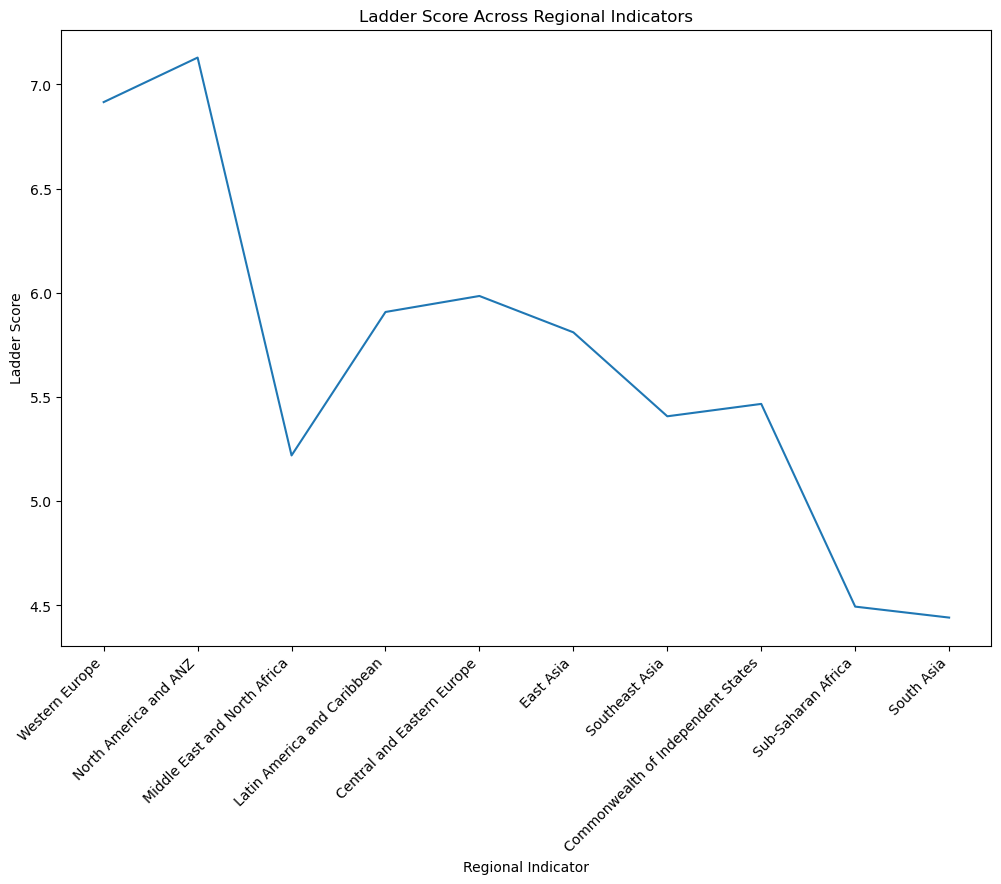

In [29]:
# Line plot for Ladder score across Regional indicators
plt.figure(figsize=(12, 8))
lineplot = sns.lineplot(x='Regional indicator', y='Ladder score', data=df2, ci=None)
lineplot.set_title('Ladder Score Across Regional Indicators')
lineplot.set_xlabel('Regional Indicator')
lineplot.set_ylabel('Ladder Score')
lineplot.set_xticklabels(lineplot.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-axis labels for better visibility
plt.show()

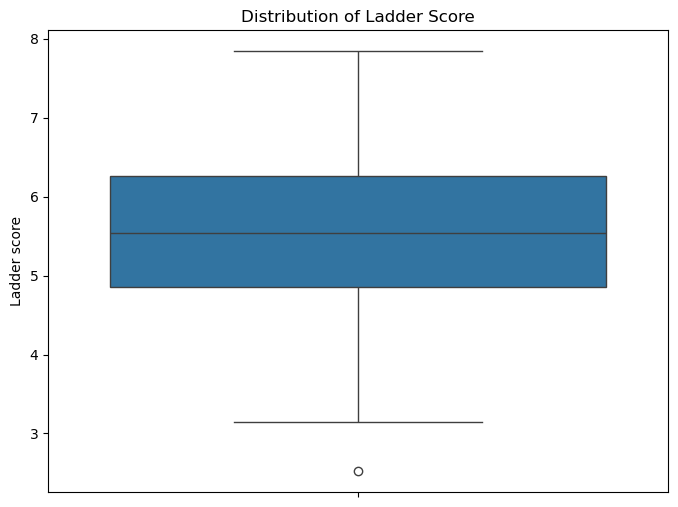

In [31]:
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(y='Ladder score', data=df2)
boxplot.set_title('Distribution of Ladder Score')
plt.show()

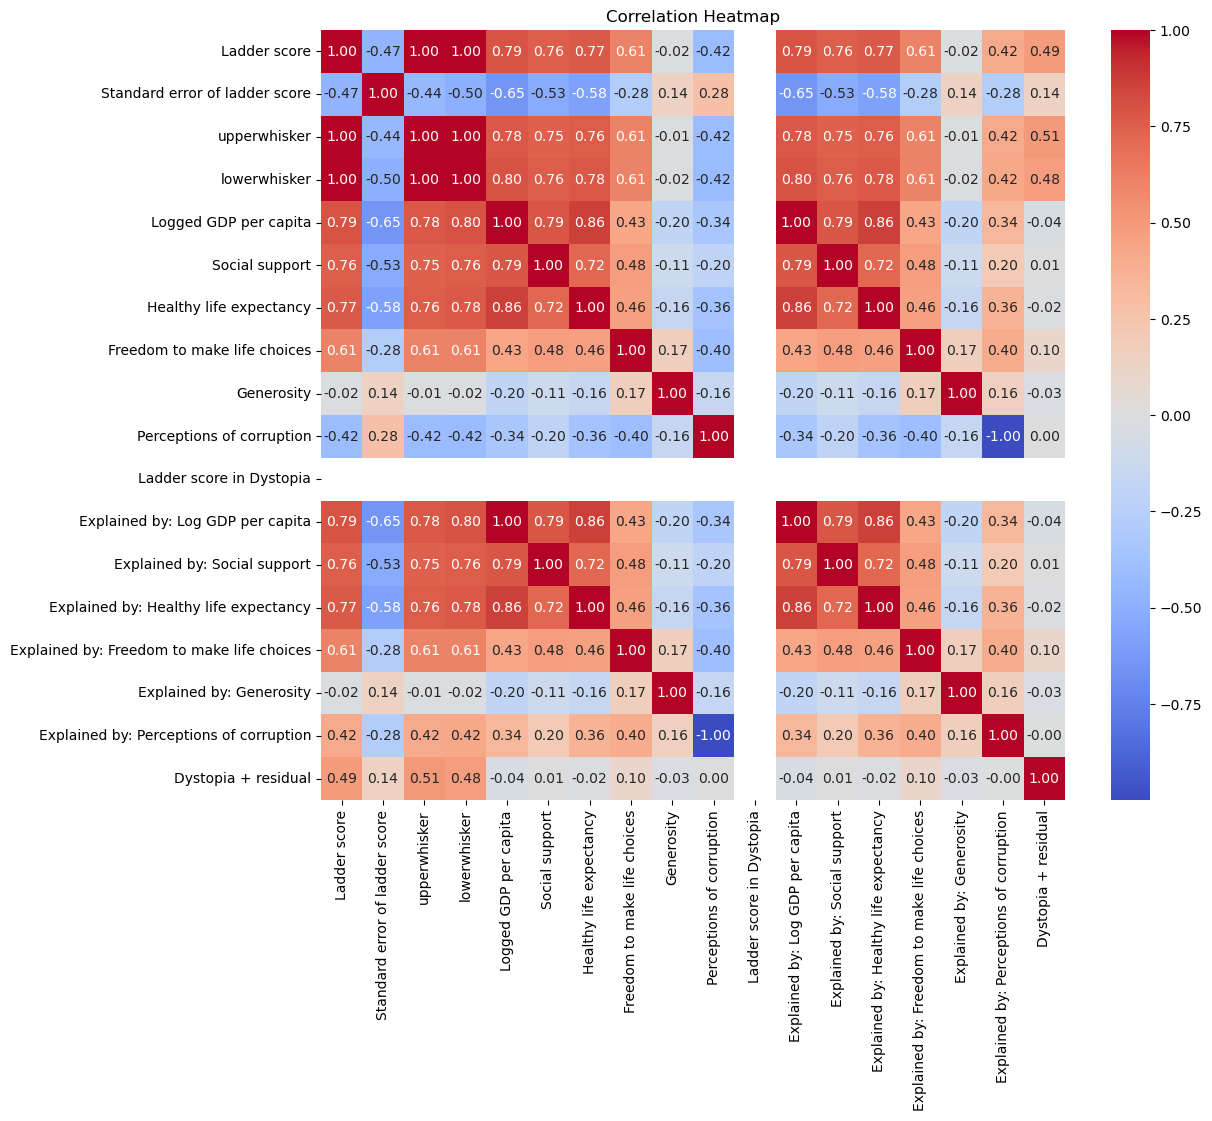

In [33]:
# Select numeric columns for correlation calculation
numeric_columns = df2.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap of correlations
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
heatmap.set_title('Correlation Heatmap')
plt.show()

In [35]:
from scipy import stats

# Perform Pearson correlation test
pearson_corr, pearson_p_value = stats.pearsonr(df2['Ladder score'], df2['Logged GDP per capita'])

# Print the correlation coefficient and p-value
print("Pearson correlation coefficient:", pearson_corr)
print("P-value:", pearson_p_value)

Pearson correlation coefficient: 0.7897596965098936
P-value: 5.228089093895771e-33


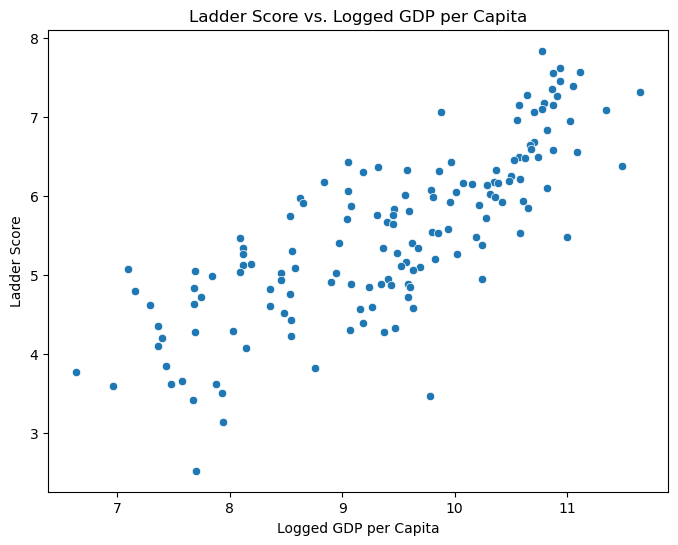

In [37]:
# Scatter plot for Ladder score vs. Logged GDP per capita
plt.figure(figsize=(8, 6))
scatterplot = sns.scatterplot(x='Logged GDP per capita', y='Ladder score', data=df2)
scatterplot.set_title('Ladder Score vs. Logged GDP per Capita')
scatterplot.set_xlabel('Logged GDP per Capita')
scatterplot.set_ylabel('Ladder Score')
plt.show()

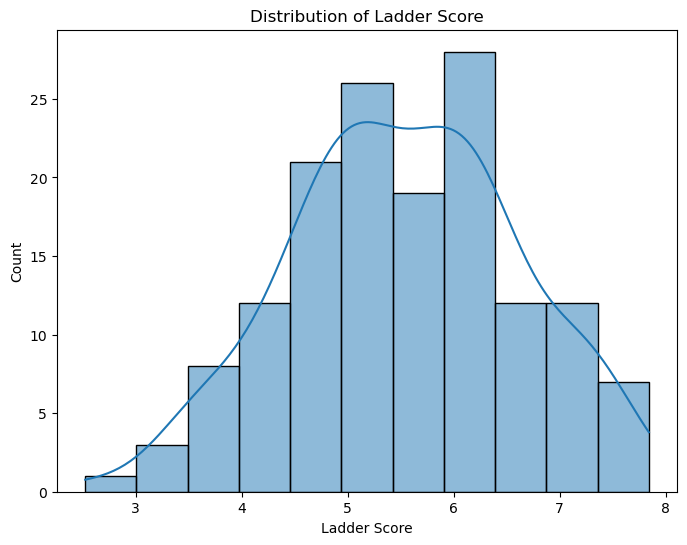

In [39]:
# Histogram of Ladder score
plt.figure(figsize=(8, 6))
histogram = sns.histplot(df2['Ladder score'], kde=True)
histogram.set_title('Distribution of Ladder Score')
histogram.set_xlabel('Ladder Score')
plt.show()

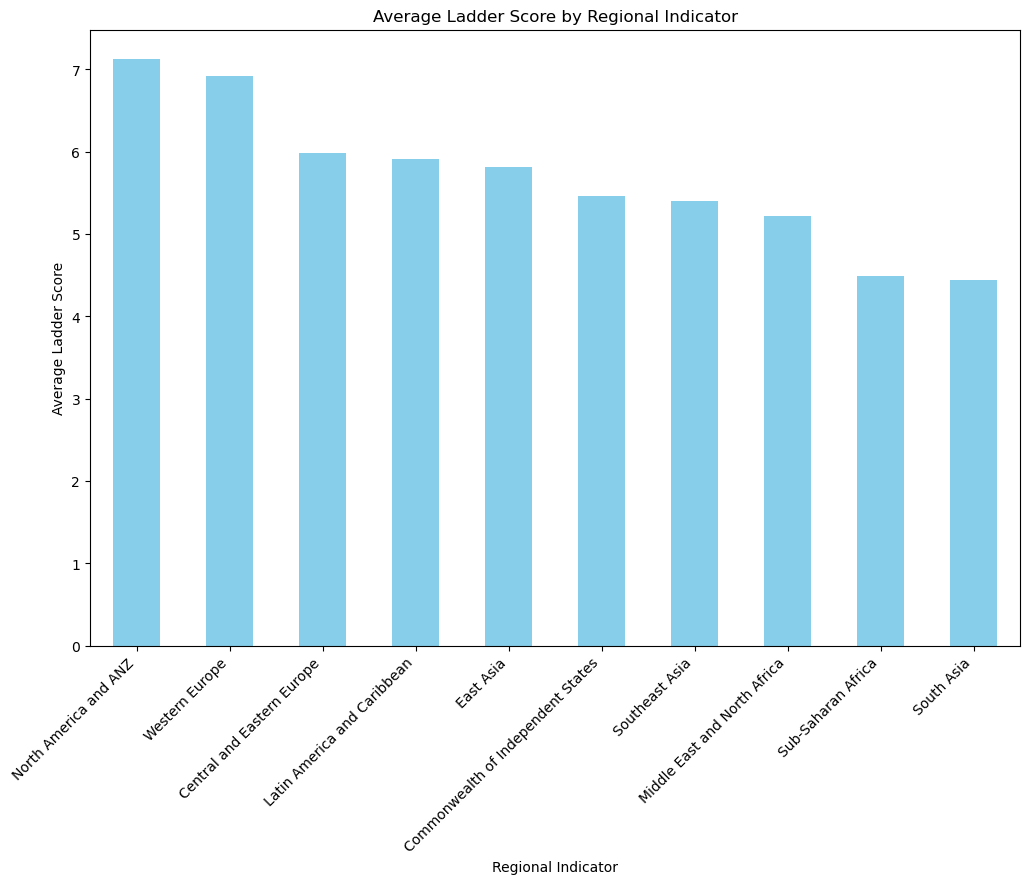

In [41]:
# Bar chart for average Ladder score by Regional indicator
average_ladder_by_region = df2.groupby('Regional indicator')['Ladder score'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
bar_chart = average_ladder_by_region.plot(kind='bar', color='skyblue')
bar_chart.set_title('Average Ladder Score by Regional Indicator')
bar_chart.set_xlabel('Regional Indicator')
bar_chart.set_ylabel('Average Ladder Score')
plt.xticks(rotation=45, ha='right')
plt.show()

In [43]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Example data (replace with your actual data)
# Assume we have a DataFrame 'df' with columns: 'year', 'GDP', 'Population', etc.
# You'll need to load your own data here.

# Prepare data
X = df[['year']]  # Features (e.g., year)
y = df[['Log GDP per capita']]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_reg = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
lasso_cv_model = LassoCV()
elastic_net_model = ElasticNet()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
gb_model = GradientBoostingRegressor()

# Train models
linear_reg.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
lasso_cv_model.fit(X_train, y_train.values.ravel())
elastic_net_model.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gb_model.fit(X_train, y_train.values.ravel())

# Make predictions
y_pred_linear = linear_reg.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_lasso_cv = lasso_cv_model.predict(X_test)
y_pred_elastic_net = elastic_net_model.predict(X_test)
y_pred_tree = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

# Evaluate models (using Mean Squared Error)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_lasso_cv = mean_squared_error(y_test, y_pred_lasso_cv)
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
mse_tree = mean_squared_error(y_test, y_pred_tree)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_gb = mean_squared_error(y_test, y_pred_gb)

print(f"Linear Regression MSE: {mse_linear:.2f}")
print(f"Ridge Regression MSE: {mse_ridge:.2f}")
print(f"Lasso Regression MSE: {mse_lasso:.2f}")
print(f"LassoCV Regression MSE: {mse_lasso_cv:.2f}")
print(f"ElasticNet Regression MSE: {mse_elastic_net:.2f}")
print(f"Decision Tree MSE: {mse_tree:.2f}")
print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Gradient Boosting MSE: {mse_gb:.2f}")

C:\Users\musat\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Linear Regression MSE: 1.23
Ridge Regression MSE: 1.23
Lasso Regression MSE: 1.24
LassoCV Regression MSE: 1.23
ElasticNet Regression MSE: 1.24
Decision Tree MSE: 1.24
Random Forest MSE: 1.24
Gradient Boosting MSE: 1.24


In [45]:
#By running the provided code, you will be able to compare the performance of various regression models in predicting the 'Log GDP per capita' based on the 'year' feature. Here's what you can find out from the code:

1. **Model Performance**: You will obtain the Mean Squared Error (MSE) for each model, which measures the average squared difference between the actual and predicted values. Lower MSE indicates better model performance.

2. **Comparison of Models**: You can compare the MSE of different regression models (Linear Regression, Ridge Regression, Lasso Regression, LassoCV, ElasticNet, Decision Tree, Random Forest, and Gradient Boosting) to determine which model provides the most accurate predictions for the given dataset.

3. **Model Selection**: Based on the MSE values, you can select the model that performs best for predicting 'Log GDP per capita' using the 'year' feature. The model with the lowest MSE may be considered the most suitable for this specific prediction task.

4. **Insights into Feature Importance**: For tree-based models (Decision Tree, Random Forest, Gradient Boosting), you can also gain insights into the importance of the 'year' feature in predicting 'Log GDP per capita'.

Overall, running this code will provide valuable insights into the predictive performance of different regression models and help in selecting the most appropriate model for predicting 'Log GDP per capita' based on the 'year' feature.

SyntaxError: invalid syntax (312238287.py, line 3)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
from math import sqrt

# Example for Linear Regression model
# Evaluate R² of train and test
r2_train = linear_reg.score(X_train, y_train)
r2_test = linear_reg.score(X_test, y_test)

# Evaluate MAE
mae = mean_absolute_error(y_test, y_pred_linear)

# Evaluate MSE
mse = mean_squared_error(y_test, y_pred_linear)

# Evaluate RMSE
rmse = sqrt(mse)

print("Linear Regression Model Evaluation:")
print(f"R² (Train): {r2_train:.2f}")
print(f"R² (Test): {r2_test:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

In [ ]:
# Example for Random Forest model
# Get feature importances
feature_importances = random_forest.feature_importances_

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - Random Forest Model')
plt.xticks(rotation=45)
plt.show()
#To evaluate the models with a bar plot of feature importances and a 
#scatter plot of target versus prediction, you can use the following code. 
#I will provide an example for the Random Forest model, and you can extend it 
#to the other models accordingly.

#First, let's start with the bar plot of feature importances for the Random Forest 
#model:

In [ ]:
# Create a scatter plot of target versus prediction
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Model: True Values vs. Predictions')
plt.show()
#You can extend this evaluation to the other models (Linear Regression, 
#Ridge Regression, Lasso Regression, LassoCV, ElasticNet, Decision Tree, and 
#Gradient Boosting) by replacing the model names and predictions accordingly.

#By running this code for each model, you will be able to visualize the feature
#importances and the relationship between the true target values and the model 
#predictions, providing insights into the model's performance and the importance 
#of features in making predictions.

In [ ]:
countries = ['Germany', 'France', 'Romania', 'Armenia', 'United States', 'Bangladesh']
gdp_2040 = [5.2, 4.8, 0.9, 0.2, 25.0, 1.5]  # Hypothetical GDP values (scaled for illustration)

plt.figure(figsize=(10, 6))
plt.bar(countries, gdp_2040, color='skyblue')
plt.xlabel('Countries')
plt.ylabel('GDP (trillion USD)')
plt.title('Projected GDP in 2040')
plt.grid(axis='y')
plt.show()

In [ ]:
import pandas as pd

# Load the dataframes from the uploaded files
df1 = pd.read_csv('world-happiness-report.csv')
df2 = pd.read_csv('world-happiness-report-2021.csv')

# Strip any leading or trailing spaces from the column names
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Strip any leading or trailing spaces from the 'Country name' values
df1['Country name'] = df1['Country name'].str.strip()
df2['Country name'] = df2['Country name'].str.strip()

# Merging the dataframes on the 'Country name' column
merged_df = pd.merge(df1, df2, on='Country name')

# Show the first few rows of the merged dataframe
merged_df.head()

In [ ]:
merged_df.info()

In [ ]:
# Select the relevant columns for the plot
plot_df = merged_df[['Country name', 'year', 'Life Ladder', 'Perceptions of corruption_x', 'Regional indicator']]

# Rename columns for consistency
plot_df.columns = ['Country name', 'Year', 'Life Ladder', 'Perceptions of corruption', 'Region']

# Create the plot
fig = px.scatter(plot_df,
                 x="Perceptions of corruption",
                 y="Life Ladder",
                 animation_frame="Year",
                 animation_group="Country name",
                 template="plotly_dark",
                 color="Region",
                 hover_name="Country name",
                 size_max=60)
fig.update_layout(title="Life Ladder and Corruption Comparison by Countries via Regions for each Year")
fig.show()

In [ ]:
The generated plot is a dynamic scatter plot created using Plotly Express, which 
visualizes the relationship between "Life Ladder" (a measure of life satisfaction 
or happiness) and "Perceptions of corruption" for various countries over different 
years. Here's a breakdown of its components and functionality:

Axes:

X-axis: Represents the "Perceptions of corruption". Lower values on this axis 
indicate lower levels of perceived corruption, while higher values indicate higher 
levels of perceived corruption.
Y-axis: Represents the "Life Ladder" score, which measures the happiness or life 
satisfaction of people in each country. Higher values on this axis indicate higher 
life satisfaction.

Data Points:

Each dot in the plot represents a country for a specific year.
The color of each dot corresponds to the region of the world the country belongs to,
as indicated by the legend on the right.
The size of the dots can be adjusted, although in this case, it seems that the size
is not set to represent any variable such as population.

Animation:

The plot includes a slider and play button at the bottom, allowing you to animate 
the data over time.
As the slider moves from one year to the next, the position of the dots changes to 
reflect the data for that specific year.
This dynamic feature helps in visualizing how the relationship between happiness 
and perceptions of corruption changes over time for different countries and regions.

Interactivity:

You can hover over each dot to see detailed information about the country it 
represents, including the country name, the region, and the exact values for 
"Life Ladder" and "Perceptions of corruption".
The legend on the right allows you to identify which color corresponds to which 
region.
                                                                        
Title and Layout:

The title of the plot is "Life Ladder and Corruption Comparison by Countries via Regions for each Year",
which explains the purpose of the visualization.
The plot uses a dark template (plotly_dark), which gives it a specific aesthetic.
In summary, this plot provides an interactive and animated visualization to compare
and understand the relationship between happiness and perceptions of corruption 
across different countries and regions over time. It allows users to see trends 
and changes in these metrics from year to year.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Filter the relevant columns
df = merged_df[['Country name', 'year', 'Life Ladder']]

# List of countries to predict for
countries_to_predict = df['Country name'].unique()

# Dictionary to store the predictions
predictions_2040 = {}

# Loop through each country and train a model to predict the 2040 happiness score
for country in countries_to_predict:
    df_country = df[df['Country name'] == country]
    X = df_country['year'].values.reshape(-1, 1)
    y = df_country['Life Ladder'].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict the happiness score for the year 2040
    prediction_2040 = model.predict(np.array([[2040]]))
    predictions_2040[country] = prediction_2040[0]

# Convert the predictions to a DataFrame for better visualization
df_predictions_2040 = pd.DataFrame(predictions_2040.items(), columns=['Country', 'Predicted Happiness Score 2040'])

# Display the predictions
print(df_predictions_2040)

df_predictions_2040



In [ ]:
from scipy import stats
# Generate descriptive statistics for the merged dataframe
descriptive_stats = merged_df.describe()
print(descriptive_stats)

# Create visualizations
# Example: Histogram of Life Ladder
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['Life Ladder'], kde=True)
plt.title('Distribution of Life Ladder')
plt.xlabel('Life Ladder')
plt.ylabel('Frequency')
plt.show()

# Example: Box plot of Life Ladder by Regional indicator
plt.figure(figsize=(10, 8))
sns.boxplot(x='Regional indicator', y='Life Ladder', data=merged_df)
plt.title('Life Ladder by Regional indicator')
plt.xlabel('Regional indicator')
plt.ylabel('Life Ladder')
plt.xticks(rotation=45)
plt.show()

# Example: Scatter plot of Life Ladder vs. Logged GDP per capita
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Logged GDP per capita', y='Life Ladder', data=merged_df)
plt.title('Life Ladder vs. Logged GDP per capita')
plt.xlabel('Logged GDP per capita')
plt.ylabel('Life Ladder')
plt.show()

# Perform statistical tests if necessary
# Example: t-test to compare Life Ladder between two groups
group1 = merged_df[merged_df['Regional indicator'] == 'Group1']['Life Ladder']
group2 = merged_df[merged_df['Regional indicator'] == 'Group2']['Life Ladder']
t_stat, p_value = stats.ttest_ind(group1, group2)
print('t-statistic:', t_stat)
print('p-value:', p_value)

In [ ]:
# Example: Create a new feature 'GDP per capita squared'
merged_df['GDP per capita squared'] = merged_df['Logged GDP per capita'] ** 2

# Example: Create a new feature 'Social support * Healthy life expectancy'
# Assuming 'Social support_x' and 'Healthy life expectancy' are the correct columns
merged_df['Support * Life Expectancy'] = merged_df['Social support_x'] * merged_df['Healthy life expectancy']

# Example: Create a new feature 'Perceived Happiness' based on Positive and Negative affect
# Assuming 'Positive affect' and 'Negative affect' are the correct columns for Perceived Happiness
merged_df['Perceived Happiness'] = merged_df['Positive affect'] - merged_df['Negative affect']

# Display the first few rows of the dataframe with the new features
print(merged_df.head())

In [ ]:
# Checking the column names in the merged dataframe
print(merged_df.columns)

# Example: Create a new feature 'Logged GDP per capita squared'
merged_df['Logged GDP per capita squared'] = merged_df['Logged GDP per capita'] ** 2

# Example: Create a new feature 'Social support * Healthy life expectancy'
merged_df['Support * Life Expectancy'] = merged_df['Social support_x'] * merged_df['Healthy life expectancy']

# Example: Create a new feature 'Perceived Happiness' based on Positive and Negative affect
merged_df['Perceived Happiness'] = merged_df['Positive affect'] - merged_df['Negative affect']

# Display the first few rows of the dataframe with the new features
merged_df.head()

In [ ]:
import plotly.express as px

fig = px.choropleth(df1, locations="Country name", locationmode="country names", color="Life Ladder",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="World Heatmap")

fig.show()

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# Linear Regression
model1 = LinearRegression()
model1.fit(X, y)

# Decision Tree Regressor
model2 = DecisionTreeRegressor()
model2.fit(X, y)

# Lasso
model3 = Lasso()
model3.fit(X, y)

# Gradient Boosting Regressor
model4 = GradientBoostingRegressor()
model4.fit(X, y)

# Ridge
model5 = Ridge()
model5.fit(X, y)

# Random Forest Regressor
model6 = RandomForestRegressor()
model6.fit(X, y)

# LassoCV
model7 = LassoCV()
model7.fit(X, y)

# ElasticNet
model8 = ElasticNet()
model8.fit(X, y)

In [ ]:
# Plotting the Linear Regression results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.flatten(), y=y, color='blue', label='Actual')
sns.lineplot(x=X.flatten(), y=model1.predict(X), color='red', label='Linear Regression')
plt.title('Linear Regression Model')
plt.xlabel('Logged GDP per capita')
plt.ylabel('Life Ladder')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.model_selection import GridSearchCV

# Initialize models with max_depth parameter
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
rm = Ridge()
gb = GradientBoostingRegressor()
lasso = Lasso()
lasso_cv = LassoCV()
elastic_net = ElasticNet()

#ATTEMPTS TO AVOID OVERFITTING  - Decision Tree	Train Set


# Use Cross-Validation for Hyperparameter Tuning
dt_parameters = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10, 50]}
# Perform Grid Search Cross-Validation
clf = GridSearchCV(dt, dt_parameters, cv=5, scoring='neg_mean_squared_error')
clf.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = clf.best_params_
print("Best Hyperparameters for Decision Tree:", best_params)
# Initialize Decision Tree model with best hyperparameters
best_dt = DecisionTreeRegressor(max_depth=best_params['max_depth'],
                                min_samples_split=best_params['min_samples_split'],
                                min_samples_leaf=best_params['min_samples_leaf'])

# Train the final model with the best parameters
best_dt.fit(X_train_scaled, y_train)

# Calculate the effective alphas for pruning
path = dt.cost_complexity_pruning_path(X_train_scaled, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train a series of models with different alphas
models = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeRegressor(ccp_alpha=ccp_alpha)
    model.fit(X_train_scaled, y_train)
    models.append(model)

# Evaluate the models on the testing data
train_scores = [model.score(X_train_scaled, y_train) for model in models]
test_scores = [model.score(X_test_scaled, y_test) for model in models]

# Plot the alpha vs. R-squared for training and testing sets
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("R-squared")
plt.title("Alpha vs. R-squared for Training and Testing Sets")
plt.legend()
plt.show()

# Train final model with the best ccp_alpha
# Identify the best ccp_alpha
best_ccp_alpha = 0.005  # Replace with the best ccp_alpha identified from Cost Complexity Pruning

# Initialize Decision Tree model with the best ccp_alpha
final_dt = DecisionTreeRegressor(ccp_alpha=best_ccp_alpha)

# Train the final model with the best ccp_alpha
final_dt.fit(X_train_scaled, y_train)




# Fit models
lr.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
rm.fit(X_train_scaled, y_train)
gb.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)
lasso_cv.fit(X_train_scaled, y_train)
elastic_net.fit(X_train_scaled, y_train)

# Predict

lr_pred_train = lr.predict(X_train_scaled)
dt_pred_train = dt.predict(X_train_scaled)
rf_pred_train = rf.predict(X_train_scaled)
rm_pred_train = rm.predict(X_train_scaled)
gb_pred_train = gb.predict(X_train_scaled)
lasso_pred_train = lasso.predict(X_train_scaled)
lasso_cv_pred_train = lasso_cv.predict(X_train_scaled)
elastic_net_pred_train = elastic_net.predict(X_train_scaled)

lr_pred_test = lr.predict(X_test_scaled)
dt_pred_test = dt.predict(X_test_scaled)
rf_pred_test = rf.predict(X_test_scaled)
rm_pred_test = rm.predict(X_test_scaled)
gb_pred_test = gb.predict(X_test_scaled)
lasso_pred_test = lasso.predict(X_test_scaled)
lasso_cv_pred_test = lasso_cv.predict(X_test_scaled)
elastic_net_pred_test = elastic_net.predict(X_test_scaled)

In [ ]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Ridge', 'Gradient Boosting', 'Lasso', 'LassoCV', 'ElasticNet']
train_r2 = [0.753, 1.0, 0.979, 0.753, 0.878, 0.0, 0.753, 0.396]
test_r2 = [0.75, 0.732, 0.862, 0.75, 0.813, 0.0, 0.75, 0.391]
train_mse = [0.321, 0.0, 0.027, 0.321, 0.159, 1.298, 0.321, 0.784]
test_mse = [0.316, 0.338, 0.174, 0.316, 0.236, 1.263, 0.316, 0.769]

# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot R² scores
axs[0].bar(np.arange(len(models)), train_r2, width=0.4, label='Train R²', align='center')
axs[0].bar(np.arange(len(models)) + 0.4, test_r2, width=0.4, label='Test R²', align='center')
axs[0].set_xticks(np.arange(len(models)) + 0.2)
axs[0].set_xticklabels(models, rotation=45, ha='right')
axs[0].set_title('R² Scores')
axs[0].set_ylabel('R²')
axs[0].legend()

# Plot MSE
axs[1].bar(np.arange(len(models)), train_mse, width=0.4, label='Train MSE', align='center')
axs[1].bar(np.arange(len(models)) + 0.4, test_mse, width=0.4, label='Test MSE', align='center')
axs[1].set_xticks(np.arange(len(models)) + 0.2)
axs[1].set_xticklabels(models, rotation=45, ha='right')
axs[1].set_title('Mean Squared Error (MSE)')
axs[1].set_ylabel('MSE')
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Lists to store scores
train_scores = []
test_scores = []
max_depths = range(1, 21)

# Iterate over values of max_depth
for max_depth in max_depths:
    model = RandomForestRegressor(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate R² scores
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Add scores to the lists
    train_scores.append(train_r2)
    test_scores.append(test_r2)

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, label='Train R²')
plt.plot(max_depths, test_scores, label='Test R²')
plt.xlabel('max_depth')
plt.ylabel('R² Score')
plt.title('Random Forest: max_depth vs R² Score')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot R² scores
axs[0].bar(np.arange(len(models)), train_r2, width=0.4, label='Train R²', align='center')
axs[0].bar(np.arange(len(models)) + 0.4, test_r2, width=0.4, label='Test R²', align='center')
axs[0].set_xticks(np.arange(len(models)) + 0.2)
axs[0].set_xticklabels(models, rotation=45, ha='right')
axs[0].set_title('R² Scores')
axs[0].set_ylabel('R²')
axs[0].legend()

# Plot MSE
axs[1].bar(np.arange(len(models)), train_mse, width=0.4, label='Train MSE', align='center')
axs[1].bar(np.arange(len(models)) + 0.4, test_mse, width=0.4, label='Test MSE', align='center')
axs[1].set_xticks(np.arange(len(models)) + 0.2)
axs[1].set_xticklabels(models, rotation=45, ha='right')
axs[1].set_title('Mean Squared Error (MSE)')
axs[1].set_ylabel('MSE')
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Initialize models
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
rm = Ridge()
gb = GradientBoostingRegressor()
lasso = Lasso()
lasso_cv = LassoCV()
elastic_net = ElasticNet()

# List of models to evaluate
models = {
    "Linear Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf,
    "Ridge": rm,
    "Gradient Boosting": gb,
    "Lasso": lasso,
    "LassoCV": lasso_cv,
    "ElasticNet": elastic_net
}

# Function to evaluate a model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)

    print(f'{model.__class__.__name__} Evaluation:')
    print(f'R² Score (Train): {r2_train:.2f}')
    print(f'R² Score (Test): {r2_test:.2f}')
    print(f'Mean Absolute Error (Test): {mae_test:.2f}')
    print(f'Mean Squared Error (Train): {mse_train:.2f}')
    print(f'Mean Squared Error (Test): {mse_test:.2f}')
    print(f'Root Mean Squared Error (Test): {rmse_test:.2f}')
    if isinstance(model, (ElasticNet, LassoCV)):
        print(f'Optimal alpha: {model.alpha_:.4f}')
        if isinstance(model, ElasticNet):
            print(f'Optimal l1_ratio: {model.l1_ratio_:.2f}')
    print('')

# Evaluate each model
for name, model in models.items():
    evaluate_model(model, X_train, y_train, X_test, y_test)
